<a href="https://colab.research.google.com/github/Nichapad-B/Teamproject_Accident/blob/main/Project_KNNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2602454: BUS INT SYS


[My Project's Github](------)







---


# $\color{orange}{\text{รายชื่อสมาชิกกลุ่ม}}$ 

---


*   6241020026 ขวัญกมล กิตติอุดม  
*   6241050926 ณฐกร พรวิวัฒน์  
*   6241072726 ณิชาภัทร บุญพาวัฒนา  
*   6241188926 ระนาดแก้ว เดชาคณิต  


---







# $\color{red}{\text{จริงหรือไม่ ? ขับรถตอนกลางคืน ตอนฝนตกหรือตอนเทศกาล เสี่ยงเกิดอุบัติเหตุบ่อยที่สุด}}$ 



In [ ]:
import sys
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn import metrics

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
print(f'Python  version: {sys.version}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pd.Timestamp.now()

Python  version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
pandas  version: 1.3.5
numpy   version: 1.21.6
seaborn version: 0.11.2


Timestamp('2022-05-11 05:19:14.371121')

In [ ]:
url = 'https://raw.githubusercontent.com/Nichapad-B/Teamproject_Accident/main/accident_2565.csv'
df = pd.read_csv(url, encoding='utf-8', parse_dates=['accident_date'])
df.head()

,accident_date,accident_time,step,ad_state,acman_rec,acfem_rec,deadman_rec,deadfem_rec,cause_type
0,2022-02-28,16:50:50,ศรีรัช-วงแหวนรอบนอก,ปกติ,0,0,0,0,ขับรถเร็วเกินไป
1,2022-02-26,23:34:34,ฉลองรัช,ปกติ,0,0,0,0,ขับรถเร็วเกินไป
2,2022-02-25,09:31:31,ศรีรัช,ปกติ,0,0,0,0,เบรคขัดข้อง
3,2022-02-25,21:55:55,ศรีรัช,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน
4,2022-02-25,00:38:38,ฉลองรัช,ปกติ,0,0,0,0,ขับรถเร็วเกินไป


# $\color{orange}{\text{Prepare Data & Data Cleansing}}$ 


---


*     
Rename columns

  เนื่องจากชื่อคอลัมน์เป็นสิ่งที่สำคัญในการใช้งานข้อมูล เป็นตัวแปรที่สำคัญที่สื่อความหมายหน้าที่ของข้อมูล ดังนั้นเราทำการเปลี่ยนชื่อคอลัมน์เพื่อให้เข้าใจง่ายขึ้น ดังนี้
  * ad_state เป็น weather_stat
  * acman_rec เป็น injur_man
  * acfem_rec เป็น injur_female
  * deadman_rec เป็น dead_man
  * deadfem_rec เป็น dead_female  

* ใช้ฟังค์ชั่น isnull เช็คค่าข้อมูลที่เป็น NaN หรือไม่มีค่า

  พบว่าไม่มีค่าไหนที่เป็น null และฟังค์ชั่น info() ดูประเภท/ชนิดข้อมูล พบว่ามีค่าที่เป็น datetime 1 คอลัมน์ object 4 คอลัมน์ และ int 4 คอลัมน์ จากนั้นใช้ฟังค์ชั่น describe เพื่อดูสถิติเชิงบรรยายที่สรุปแนวโน้มศูนย์กลางการกระจายตัวและรูปร่างของการแจกแจงของชุดข้อมูลโดยจะไม่นับรวมค่า NaN หรือ missing data

* จัดหมวดหมู่อุบัติเหตุ
 
  เนื่องจากในข้อมูลดั้งเดิมมีทั้งการบันทึกที่สะกดผิด บันทึกซ้ำแต่ใช้คนละคำพูด เพื่อความเป็นระเบียบในการวิเคราะห์ข้อมูล จึงจัดหมวดหมู่ออกเป็น 10 หมวด ได้แก่
  1. เกิดอุบัติเหตุโดยขับรถโดยประมาท
  2. ขับรถในระยะกระชั้นชิด
  3. เบรกกะทันหัน
  4. บรรทุกเกินขนาด
  5. เครื่องยนต์ขัดข้อง
  6. เปลี่ยนช่องทางกระทันหัน
  7. รถเสียหลัก
  8. สภาพอากาศ
  9. ยางแตก
  10. อื่น ๆ

* สร้าง datafreame sum_injur ที่รวมจำนวนผู้บาดเจ็บผู้ชายกับจำนวนผู้บาดเจ็บผู้หญิง
และ datafreame sum_dead  ซึ่งรวมจำนวนผู้เสียชีวิตผู้ชายกับจำนวนผู้เสียชีวิตผู้หญิง
* สร้าง datafreame result โดยใช้ฟังค์ชั่น loc 

   นำข้อมูล datafreame sum_injur, sum_dead มาใช้ในการจัดกลุ่มผลลัพธ์ กล่าวคือ จาก datafreame sum_injur ถ้ามีจำนวนผู้บาดเจ็บให้บันทึกว่า Have Injuries ถ้ามีจำนวนผู้เสียชีวิตให้บันทึกว่า Have Death หากมีทั้งผู้บาดเจ็บและผู้เสียชีวิตให้บันทึกว่า Have Injuries and Death และหากไม่มีทั้งผู้บาดเจ็บและเสียชีวิตให้บันทึกว่า No Injuries and Death 
* นำ datafreame sum_injur, sum_dead, result มารวมใน datafreame เดียวกัน
* ใช้ฟังค์ชั่น lambda x: x.day .month .year
 
  ทำการแยกวัน ออกจากเดือน ออกจากปี และแยกชั่วโมงออกจากเวลาเพื่อทำให้ข้อมูลแสดงผลออกมาในรูปแบบช่วงเวลา Late Night, Morning, Afternoon, Evening, Night  ใช้ในวิเคราะห์ EDA ในขั้นตอนต่อไป

In [ ]:
df.rename(columns={'ad_state': 'weather_state', 'acman_rec': 'injur_man',
                   'acfem_rec': 'injur_female', 'deadman_rec': 'dead_man', 'deadfem_rec': 'dead_female'}, inplace=True)
df

,accident_date,accident_time,step,weather_state,injur_man,injur_female,dead_man,dead_female,cause_type
0,2022-02-28,16:50:50,ศรีรัช-วงแหวนรอบนอก,ปกติ,0,0,0,0,ขับรถเร็วเกินไป
1,2022-02-26,23:34:34,ฉลองรัช,ปกติ,0,0,0,0,ขับรถเร็วเกินไป
2,2022-02-25,09:31:31,ศรีรัช,ปกติ,0,0,0,0,เบรคขัดข้อง
3,2022-02-25,21:55:55,ศรีรัช,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน
4,2022-02-25,00:38:38,ฉลองรัช,ปกติ,0,0,0,0,ขับรถเร็วเกินไป
...,...,...,...,...,...,...,...,...,...
341,2021-10-04,16:19:19,บูรพาวิถี,ปกติ,2,0,0,0,ยางแตก
342,2021-10-03,10:43:43,บางพลี-สุขสวัสดิ์,ปกติ,1,0,0,0,ไม่ชะลอความเร็ว
343,2021-10-03,21:56:56,ศรีรัช-วงแหวนรอบนอก,ฝนตก,0,0,0,0,ขับรถเร็วเกินไป
344,2021-10-01,11:25:25,ศรีรัช,ปกติ,0,0,0,0,เบรคขัดข้อง


In [ ]:
df.isnull().sum()

accident_date    0
accident_time    0
step             0
weather_state    0
injur_man        0
injur_female     0
dead_man         0
dead_female      0
cause_type       0
dtype: int64

In [ ]:
df.columns

Index(['accident_date', 'accident_time', 'step', 'weather_state', 'injur_man',
       'injur_female', 'dead_man', 'dead_female', 'cause_type'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   accident_date  346 non-null    datetime64[ns]
 1   accident_time  346 non-null    object        
 2   step           346 non-null    object        
 3   weather_state  346 non-null    object        
 4   injur_man      346 non-null    int64         
 5   injur_female   346 non-null    int64         
 6   dead_man       346 non-null    int64         
 7   dead_female    346 non-null    int64         
 8   cause_type     346 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 24.5+ KB


In [ ]:
df.describe()

,injur_man,injur_female,dead_man,dead_female
count,346.000000,346.000000,346.000000,346.000000
mean,0.320809,0.190751,0.020231,0.008671
std,0.621802,0.503352,0.140994,0.120072
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,4.000000,3.000000,1.000000,2.000000


In [ ]:
df.replace(regex=r'ฝนตกถนนเปียกลื่น', value='สภาพอากาศ', inplace=True)
df.replace(regex=r'ยางแตกล้อหลัง', value='ยางแตก', inplace=True)

In [ ]:
g1 = ['ขับรถประมาท', 'ผู้ขับขี่นั่งบุคคลก้มดูโทรศัพท' , 'ก้มเก็บสิ่งของ', 'ก้มเก็บของในรถ' , 'นั่งบุคคลตัดหน้ารถบรรทุก10ล้อ' , 'ขับชิดขอบทางขวามากเกินไป' , 'ขับรถคล่อมเลน' , 'ผู้ขับขี่หมดสติ' , 'หลับใน' ,'ขับรถเร็วเกินไป', 'ก้มเก็บของ' , 'ไม่ชะลอความเร็ว' , 'ขับรถช้าลง' , 'มองไม่เห็น', 'นั่งบุลคลอีซูซุก้มเก็บของ' , 'รถนั่งฮอนด้าขับย้อนทางลงพัฒ2' , 'นั่งบุคคลIsuzuเบรคไม่ทัน']
g2 = ['ขับรถกระชั้นชิด', 'ขับขี่กระชั้นชิด', 'ขับรถกระชิด', 'ขับขี่ในระยะกระชั้นชิด', 'กระชั้นชิดเบรกไม่ทัน', 'ขับรถกะชันชิด', 'ขับกระชั้นชิด', 'เบรคกระชั้นชิด', 'ขับรถกระชันชิด']
g3 = ['เบรคกระทันหัน', 'เบรกกระชั้นชิด', 'เบรกกะทันหันรถเสียการทรงตัว','เลรคกะทันหัน','เบรคกะทันหัน','เบครกระทันหัน']
g4 = ['บรรทุกยื่นล้ำ', 'บรรทุกเกิน/ของตกหล่น', 'บรรทุกหนัก']
g5 = ['เบรคขัดข้อง', 'เบรคไม่อยู่', 'ล้อหลุด', 'ระบบไฟฟ้าขัดข้อง', 'สลักตัวยึดหลุด','เพลาข้างด้านขวาขาด']
g6 = ['เข้าช่องเก็บค่าผ่านผิด', 'เปลี่ยนช่องทางเบรกกะทันหัน']
g7 = ['เสียหลักหมุนชนขอบทาง', 'เสียหลัก']
g8 = ['เพลิงไหม้', 'โรคประจำตัว', 'บรรทุกรถ Atvเกิดไฟฟ้าลัดวงจร', 'กระบะToyotaทำสิ่งของตกหล่น', 'ไม่ดึงเบรคมือ']

df.replace(g1, value='ขับรถโดยประมาท', inplace=True)
df.replace(g2, value='ขับรถในระยะกระชั้นชิด', inplace=True)
df.replace(g3, value='เบรกกะทันหัน', inplace=True)
df.replace(g4, value='บรรทุกเกินขนาด', inplace=True)
df.replace(g5, value='เครื่องยนต์ขัดข้อง', inplace=True)
df.replace(g6, value='เปลี่ยนช่องทางกระทันหัน', inplace=True)
df.replace(g7, value='รถเสียหลัก', inplace=True)
df.replace(g8, value='อื่นๆ', inplace=True)

In [ ]:
df.sample(10)

,accident_date,accident_time,step,weather_state,injur_man,injur_female,dead_man,dead_female,cause_type
101,2022-01-19,11:06:06,บูรพาวิถี,ปกติ,0,0,0,0,ขับรถโดยประมาท
58,2022-02-07,22:52:52,เฉลิมมหานคร,ปกติ,1,0,0,0,เปลี่ยนช่องทางกระทันหัน
59,2022-02-05,20:15:15,ศรีรัช,ปกติ,0,1,0,0,ขับรถโดยประมาท
208,2021-11-24,19:28:28,ฉลองรัช,ปกติ,0,0,0,0,เบรกกะทันหัน
203,2021-11-28,23:40:40,เฉลิมมหานคร,ปกติ,0,0,0,0,ขับรถโดยประมาท
97,2022-01-20,11:37:37,ฉลองรัช,ปกติ,1,0,0,0,ขับรถโดยประมาท
307,2021-10-18,09:29:29,ฉลองรัช,ปกติ,0,0,0,0,สภาพแวดล้อม
284,2021-10-26,18:53:53,บูรพาวิถี,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน
189,2021-12-03,00:47:47,ฉลองรัช,ปกติ,0,1,0,0,ขับรถโดยประมาท
88,2022-01-23,01:44:44,ศรีรัช,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน


In [ ]:
df['cause_type'].unique()

array(['ขับรถโดยประมาท', 'เครื่องยนต์ขัดข้อง', 'เปลี่ยนช่องทางกระทันหัน',
       'ขับรถในระยะกระชั้นชิด', 'อื่นๆ', 'ยางแตก', 'เบรกกะทันหัน',
       'รถเสียหลัก', 'บรรทุกเกินขนาด', 'สภาพแวดล้อม', 'สภาพอากาศ'],
      dtype=object)

In [ ]:
df['cause_type'].loc[df['cause_type'].str.contains('กระชั')] = 'ขับรถในระยะกระชั้นชิด'
df.sample(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,accident_date,accident_time,step,weather_state,injur_man,injur_female,dead_man,dead_female,cause_type
161,2021-12-18,01:06:06,ทางหลวงพิเศษหมายเลข 37,ปกติ,1,0,0,0,ขับรถโดยประมาท
236,2021-11-10,11:00:00,ศรีรัช,ปกติ,0,0,0,0,ขับรถในระยะกระชั้นชิด
159,2021-12-18,02:05:05,บางพลี-สุขสวัสดิ์,ปกติ,0,0,0,0,สภาพแวดล้อม
263,2021-11-01,20:40:40,ฉลองรัช,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน
337,2021-10-07,10:19:19,เฉลิมมหานคร,ปกติ,0,0,0,0,ขับรถในระยะกระชั้นชิด


In [ ]:
df['sum_injur']=df['injur_man']+df['injur_female']
df['sum_dead']=df['dead_man']+df['dead_female']

In [ ]:
dt=df[['sum_injur','sum_dead']]
dt.sample(5)

,sum_injur,sum_dead
32,0,0
279,0,0
134,1,0
188,1,0
45,1,0


In [ ]:
dt.loc[(dt['sum_injur']==0) & (dt['sum_dead']==0), 'result'] = 'No Injuries and Death'
dt.loc[(dt['sum_injur']!=0) & (dt['sum_dead']!=0), 'result'] = 'Have Injuries and Death'
dt.loc[(dt['sum_injur']!=0) & (dt['sum_dead']==0), 'result'] = 'Have Injuries'
dt.loc[(dt['sum_injur']==0) & (dt['sum_dead']!=0), 'result'] = 'Have Death'
dt.sample(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,sum_injur,sum_dead,result
202,0,0,No Injuries and Death
55,0,0,No Injuries and Death
218,2,0,Have Injuries
125,0,0,No Injuries and Death
60,0,0,No Injuries and Death
117,1,0,Have Injuries
157,1,0,Have Injuries
263,0,0,No Injuries and Death
268,1,0,Have Injuries
82,0,0,No Injuries and Death


In [ ]:
print(dt['result'].unique())

['No Injuries and Death' 'Have Death' 'Have Injuries'
 'Have Injuries and Death']


In [ ]:
df=pd.concat([df,dt['result']], axis=1)
df.head()

,accident_date,accident_time,step,weather_state,injur_man,injur_female,dead_man,dead_female,cause_type,sum_injur,sum_dead,result
0,2022-02-28,16:50:50,ศรีรัช-วงแหวนรอบนอก,ปกติ,0,0,0,0,ขับรถโดยประมาท,0,0,No Injuries and Death
1,2022-02-26,23:34:34,ฉลองรัช,ปกติ,0,0,0,0,ขับรถโดยประมาท,0,0,No Injuries and Death
2,2022-02-25,09:31:31,ศรีรัช,ปกติ,0,0,0,0,เครื่องยนต์ขัดข้อง,0,0,No Injuries and Death
3,2022-02-25,21:55:55,ศรีรัช,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน,0,0,No Injuries and Death
4,2022-02-25,00:38:38,ฉลองรัช,ปกติ,0,0,0,0,ขับรถโดยประมาท,0,0,No Injuries and Death


In [ ]:
df["day"] =df['accident_date'].map(lambda x: x.day)
df["month"] =df['accident_date'].map(lambda x: x.month)
df["year"] =df['accident_date'].map(lambda x: x.year)
df.head()

,accident_date,accident_time,step,weather_state,injur_man,injur_female,dead_man,dead_female,cause_type,sum_injur,sum_dead,result,day,month,year
0,2022-02-28,16:50:50,ศรีรัช-วงแหวนรอบนอก,ปกติ,0,0,0,0,ขับรถโดยประมาท,0,0,No Injuries and Death,28,2,2022
1,2022-02-26,23:34:34,ฉลองรัช,ปกติ,0,0,0,0,ขับรถโดยประมาท,0,0,No Injuries and Death,26,2,2022
2,2022-02-25,09:31:31,ศรีรัช,ปกติ,0,0,0,0,เครื่องยนต์ขัดข้อง,0,0,No Injuries and Death,25,2,2022
3,2022-02-25,21:55:55,ศรีรัช,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน,0,0,No Injuries and Death,25,2,2022
4,2022-02-25,00:38:38,ฉลองรัช,ปกติ,0,0,0,0,ขับรถโดยประมาท,0,0,No Injuries and Death,25,2,2022


In [ ]:
df["accident_time"] =pd.to_datetime(df['accident_time'], format='%H:%M:%S')
df["hours"] =df['accident_time'].dt.hour
df["accident_time"]=df["accident_time"].dt.time
df.head()

,accident_date,accident_time,step,weather_state,injur_man,injur_female,dead_man,dead_female,cause_type,sum_injur,sum_dead,result,day,month,year,hours
0,2022-02-28,16:50:50,ศรีรัช-วงแหวนรอบนอก,ปกติ,0,0,0,0,ขับรถโดยประมาท,0,0,No Injuries and Death,28,2,2022,16
1,2022-02-26,23:34:34,ฉลองรัช,ปกติ,0,0,0,0,ขับรถโดยประมาท,0,0,No Injuries and Death,26,2,2022,23
2,2022-02-25,09:31:31,ศรีรัช,ปกติ,0,0,0,0,เครื่องยนต์ขัดข้อง,0,0,No Injuries and Death,25,2,2022,9
3,2022-02-25,21:55:55,ศรีรัช,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน,0,0,No Injuries and Death,25,2,2022,21
4,2022-02-25,00:38:38,ฉลองรัช,ปกติ,0,0,0,0,ขับรถโดยประมาท,0,0,No Injuries and Death,25,2,2022,0


In [ ]:
for n in range(346):
    if df.loc[n,'hours'] <= 5:
        df.loc[n,'hours'] = 'Late Night'
    elif df.loc[n,'hours'] > 5 and df.loc[n,'hours'] <= 11:
        df.loc[n,'hours'] = 'Morning'
    elif df.loc[n,'hours'] > 11 and df.loc[n,'hours'] <= 15:
        df.loc[n,'hours'] = 'Afternoon'
    elif df.loc[n,'hours'] > 15 and df.loc[n,'hours'] <= 19:
        df.loc[n,'hours'] = 'Evening'
    else:
        df.loc[n,'hours'] = 'Night'

In [ ]:
da = df[['day','month','year','hours']]
da.head()

,day,month,year,hours
0,28,2,2022,Evening
1,26,2,2022,Night
2,25,2,2022,Morning
3,25,2,2022,Night
4,25,2,2022,Late Night


># $\color{orange}{\text{EDA}}$ 


---


ข้อมูลอุบัติเหตุบนทางด่วนพิเศษ ปีงบประมาณ 2565 (ต.ค.64 - ก.พ.65)

* การใช้ countplot นำเสนอ**ช่วงเวลาที่เกิดอุบัติเหตุ**มากที่สุดไปน้อยที่สุด 
  
  * กำหนดให้เส้นค่าเฉลี่ย avg เป็นสีแดง และจำนวนอุบัติเหตุที่เกิดขึ้นในช่วงเวลานั้น ๆ หากมากกว่าค่าเฉลี่ย ให้กราฟบาร์นั้นมีสีเขียวเข้ม และหากจำนวนที่เกิดอุบัติเหตุไม่ถึงค่าเฉลี่ยให้มีสีเทา 

  * จากกราฟนี้สามารถสรุปได้ว่า ช่วงเวลาตอนเช้า เป็นช่วงเวลาที่จะเกิดอุบัติเหตุมากที่สุดบนทางด่วนพิเศษ ซึ่งอาจเกิดจากเป็นชั่วโมงเร่งรีบของวัยทำงาน และวัยเรียน ทำให้รถบนทางด่วนพิเศษมีจำนวนมากและเกิดอุบัติเหตุมากที่สุด ในลำดับถัดมาคือ ช่วงเวลากลางคืน ช่วงเวลาบ่าย ช่วงเวลาเช้ามืด และอันดับสุดท้ายคือในช่วงเวลาตอนเย็น ซึ่งอาจเป็นเพราะเป็นเวลาเลิกงาน เลิกเรียนมีรถจำนวนมากบนท้องถนนจนทำให้เกิดการชะลอตัว รถติดเป็นระยะ ทำให้อัตราการเกิดอุบัติเหตุได้น้อยที่สุด

* การใช้ countplot นำเสนอ**เดือนที่เกิดอุบัติเหตุ**มากที่สุดไปน้อยที่สุด 
  * กำหนดให้เส้นค่าเฉลี่ย avg เป็นสีแดงเช่นเดียวกัน หากมากกว่าค่าเฉลี่ย ให้กราฟบาร์นั้นมีสีมะเขือเทศ และหากจำนวนที่เกิดอุบัติเหตุไม่ถึงค่าเฉลี่ยให้มีสีเทา 
  * จากกราฟนี้สามารถสรุปได้ว่า ในเดือนตุลาคมมีจำนวนการเกิดอุบัติเหตุบนทางด่วนพิเศษมากที่สุดถึง 80 ครั้ง เดือนกุมภาพันธ์เป็นลำดับที่สองด้วยการเกิดอุบัติเหตุบนทางด่วนพิเศษมากถึง 75 ครั้ง ลำดับต่อไปในพฤศจิกายน เดือนธันวาคม และอันดับสุดท้ายเดือนมกราคม ดังนั้นจะเห็นได้ชัดว่าการเกิดอุบัติเหตุบนทางด่วนพิเศษไม่ได้ขึ้นอยู่กับช่วงเดือนเทศกาลหรือช่วงเดือนที่คาดว่าจะมีอัตราการเกิดอุบัติเหตุมาก แต่อาจขึ้นอยู่กับตัวบุคคลที่ประมาทในการขับรถจนเกิดอุบัติเหตุบนท้องถนนก็เป็นได้

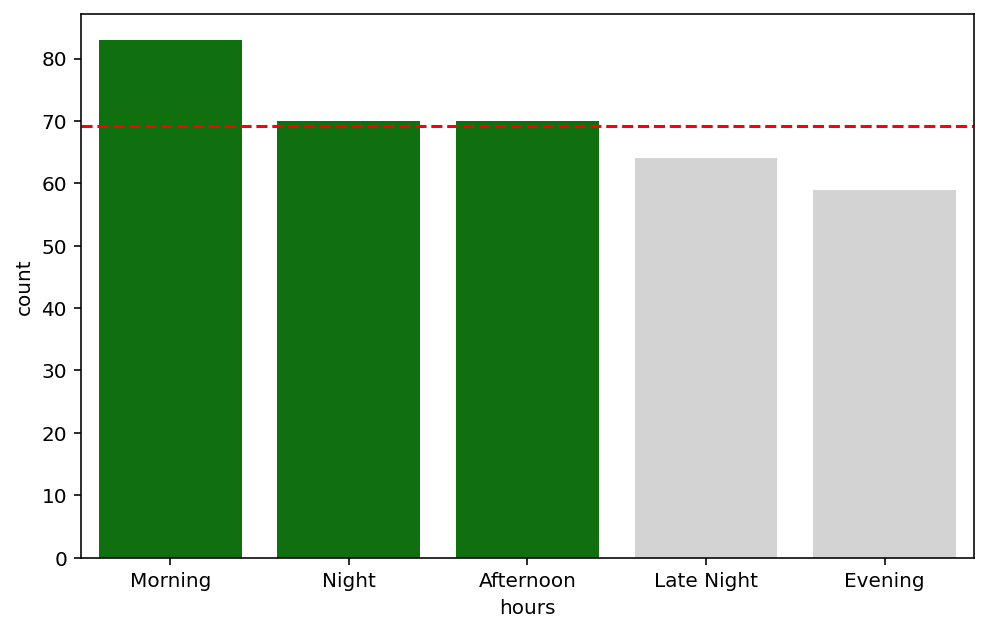

In [ ]:
avg=df['hours'].value_counts().mean()
colors = ['green' if (x > avg) else 'lightgray' for x in df['hours'].value_counts()]
plt.figure(figsize=(8, 5))
sns.countplot(x = 'hours',
              data = df,
              palette = colors,
              order = df['hours'].value_counts().index)
plt.axhline(y=avg, linestyle='--', color='red')

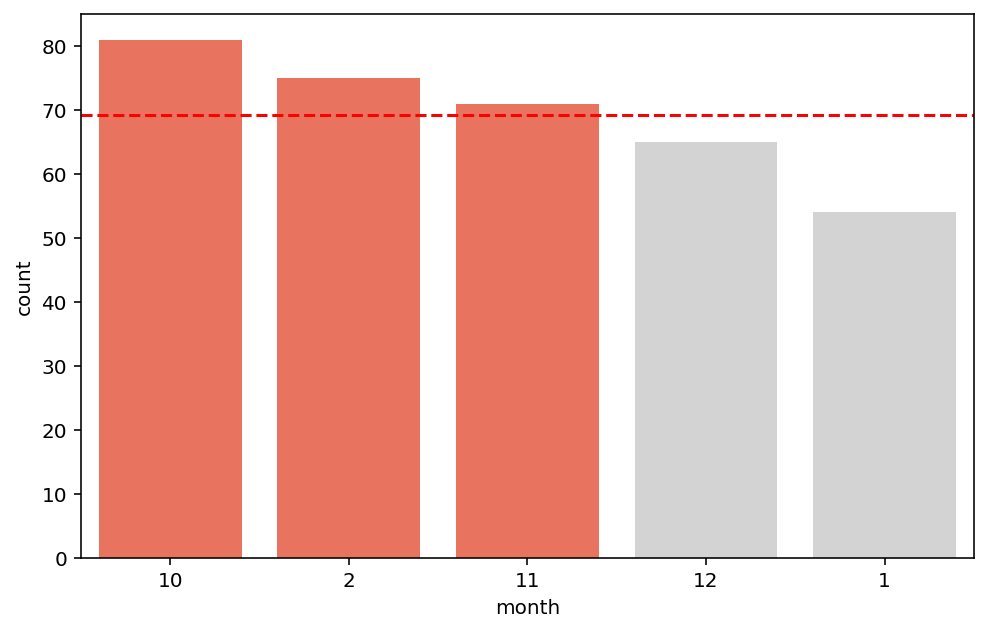

In [ ]:
avg=df['month'].value_counts().mean()
colors = ['tomato' if (x > avg) else 'lightgray' for x in df['month'].value_counts()]
plt.figure(figsize=(8, 5))
sns.countplot(x = 'month',
              data = df,
              palette = colors,
              order = df['month'].value_counts().index)
plt.axhline(y=avg, linestyle='--', color='red')

In [ ]:
from sklearn.preprocessing import LabelEncoder
def labelencode(data, columns):
    for i in columns:
        lb = LabelEncoder().fit_transform(data[i])
        data[i + '_'] = lb
columns = ['step', 'weather_state', 'cause_type']
labelencode(df, columns)

In [ ]:
y_le = LabelEncoder()
y_s = y_le.fit_transform(df.result)
df['result_'] = y_s

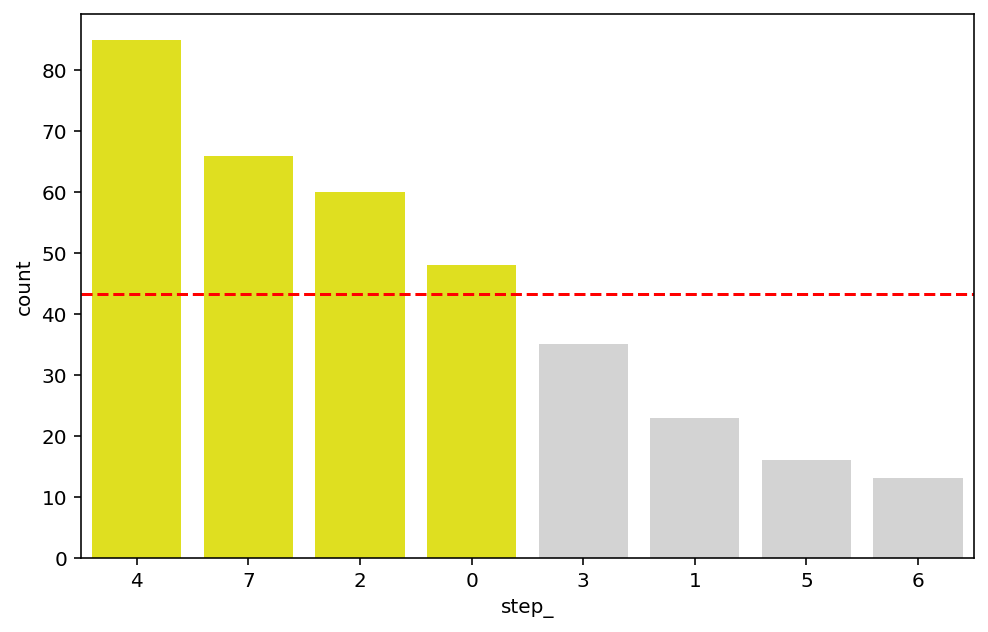

In [ ]:
avg=df['step_'].value_counts().mean()
colors = ['yellow' if (x > avg) else 'lightgray' for x in df['step_'].value_counts()]
plt.figure(figsize=(8, 5))
sns.countplot(x = 'step_',
              data = df,
              palette = colors,
              order = df['step_'].value_counts().index)
plt.axhline(y=avg, linestyle='--', color='red')

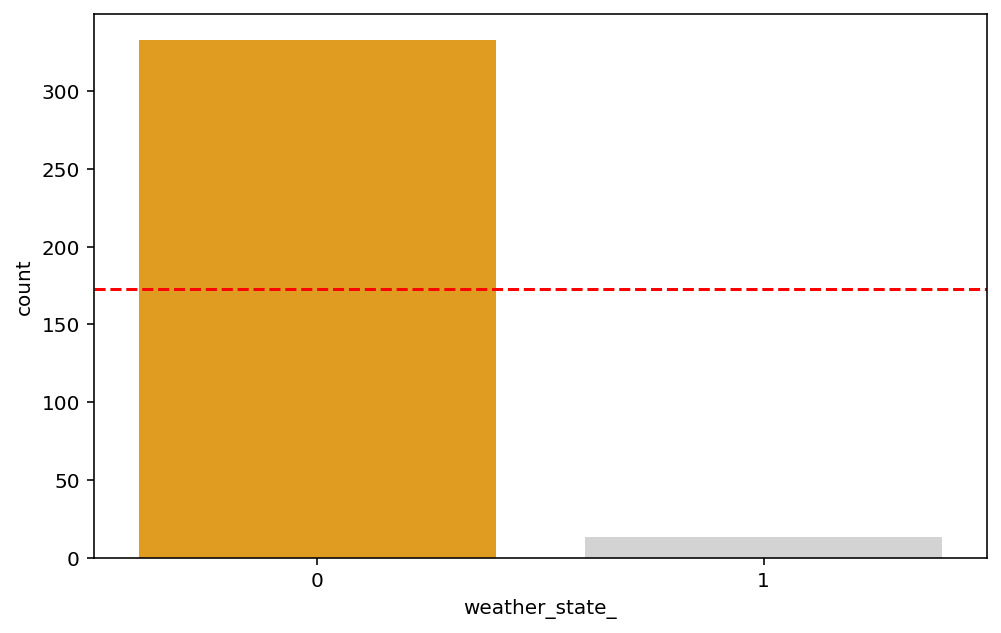

In [ ]:
avg=df['weather_state_'].value_counts().mean()
colors = ['orange' if (x > avg) else 'lightgray' for x in df['weather_state_'].value_counts()]
plt.figure(figsize=(8, 5))
sns.countplot(x = 'weather_state_',
              data = df,
              palette = colors,
              order = df['weather_state_'].value_counts().index)
plt.axhline(y=avg, linestyle='--', color='red')

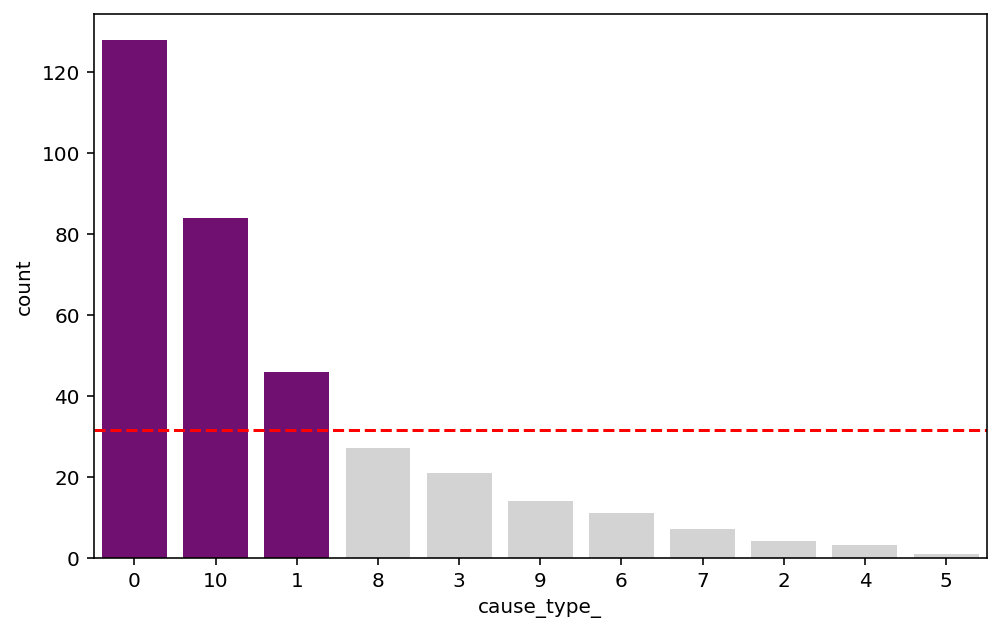

In [ ]:
avg=df['cause_type_'].value_counts().mean()
colors = ['purple' if (x > avg) else 'lightgray' for x in df['cause_type_'].value_counts()]
plt.figure(figsize=(8, 5))
sns.countplot(x = 'cause_type_',
              data = df,
              palette = colors,
              order = df['cause_type_'].value_counts().index)
plt.axhline(y=avg, linestyle='--', color='red')

## สรุป EDA

จากกราฟ EDA ทั้งหมดที่กล่าวมาข้างต้น ทำให้ได้ข้อสรุปว่าการขับรถตอนกลางคืน หรือขับรถในสภาพอากาศฝนตก การขับรถในตอนเทศกาล $\color{red}{\text{ไม่เป็น}}$สาเหตุทำให้เกิดอุบัติเหตุบนท้องถนน แต่อาจขึ้นอยู่กับผู้ขับขี่ไม่ปฏิบัติตามกฎจราจร ไม่รักษามารยาทในการขับรถ ซึ่งอาจนำไปสู่การขับรถโดยประมาทในที่สุด ทำให้เกิดอุบัติเหตุบนท้องถนน และการสูญเสียที่อาจตามมาได้



---



# $\color{orange}{\text{Machine Learning}}$ 


---


ขั้นตอน
* กำหนด feature หรือ X ได้แก่ step, weather_state, cause_type 
* กำหนด label หรือ y ได้แก่ result
* ตรวจสอบดูมิติของ X, y โดย X จะได้ว่ามี 346 แถว 3 คอลัมน์
และ y จะได้ว่ามี 346 แถว 
* เปลี่ยนข้อมูล feature และ label จาก string เป็น float เพื่อให้นำข้อมูลไปใช้ทำนายต่อได้ โดยทำการ**เข้ารหัสแปลง string ให้เป็นตัวเลข**เสียก่อน เรียกว่า **label encoding** เมื่อแปลงแล้วจะเอามาเก็บไว้ที่คอลัมน์ step_, weather_state_, cause_type_, result_ 
* กำหนด X และ y ใหม่เป็น X_s, y_s
* ตรวจดูมิติอีกครั้ง


### Feature (X)
เป็นตัวแปรต้นที่ใช้ในการนำทายจำนวนผู้บาดเจ็บ รวมไปถึงจำนวนผู้เสียชีวิตในอุบัติเหตุบนทางพิเศษ
* step คือ ทางพิเศษต่าง ๆ
* step_ คือ ทางพิเศษต่าง ๆ ซึ่งแทนด้วยตัวเลข 0-7

  0 = ฉลองรัช, 1 = ทางหลวงพิเศษหมายเลข 37, 2 = บางพลี-สุขสวัสดิ์, 3 =  บูรพาวิถี, 4 = ศรีรัช, 5 = ศรีรัช-วงแหวนรอบนอก, 6 = อุดรรัถยา, 7 = เฉลิมมหานคร
* weather_state คือ สภาพภูมิอากาศขณะเกิดอุบัติเหตุ
* weather_state_ คือ สภาพภูมิอากาศขณะเกิดอุบัติเหตุ ซึ่งแทนด้วยตัวเลข 0,1 

  0 = ปกติ, 1 = ฝนตก
* cause_type คือ ประเภทการเกิดอุบัติเหตุ 
* cause_type_ คือ ประเภทการเกิดอุบัติเหตุ ซึ่งแทนด้วยตัวเลข 0-10

  0 = ขับรถโดยประมาท, 1 = ขับรถในระยะกระชั้นชิด, 2 = บรรทุกเกินขนาด, 3 = ยางแตก, 4 = รถเสียหลัก, 5 = สภาพอากาศ, 6 = สภาพแวดล้อม, 7 = อื่นๆ, 8 = เครื่องยนต์ขัดข้อง, 9 = เบรกกะทันหัน, 10 = เปลี่ยนช่องทางกระทันหัน




In [ ]:
feature_cols = ['step', 'weather_state', 'cause_type']
X = df[feature_cols]
X.tail()

,step,weather_state,cause_type
341,บูรพาวิถี,ปกติ,ยางแตก
342,บางพลี-สุขสวัสดิ์,ปกติ,ขับรถโดยประมาท
343,ศรีรัช-วงแหวนรอบนอก,ฝนตก,ขับรถโดยประมาท
344,ศรีรัช,ปกติ,เครื่องยนต์ขัดข้อง
345,ศรีรัช-วงแหวนรอบนอก,ฝนตก,สภาพแวดล้อม


In [ ]:
X.shape

(346, 3)

### Label (y)
result_ คือ ผลลัพธ์ว่ามีผู้บาดเจ็บและผู้เสียชีวิตหรือไม่ โดยแบ่งได้ดังนี้
 * 0 แทน Have Death
 * 1 แทน Have Injuries
 * 2 แทน Have Injuries and Death
 * 3 แทน No Injuries and Death

In [ ]:
y = df.result
y

0      No Injuries and Death
1      No Injuries and Death
2      No Injuries and Death
3      No Injuries and Death
4      No Injuries and Death
               ...          
341            Have Injuries
342            Have Injuries
343    No Injuries and Death
344    No Injuries and Death
345    No Injuries and Death
Name: result, Length: 346, dtype: object

In [ ]:
y.shape

(346,)

In [ ]:
from sklearn.preprocessing import LabelEncoder

def labelencode(data, columns):
    for i in columns:
        lb = LabelEncoder().fit_transform(data[i])
        data[i + '_'] = lb

columns = ['step', 'weather_state', 'cause_type']
labelencode(df, columns)

In [ ]:
y_le = LabelEncoder()
y_s = y_le.fit_transform(df.result)
df['result_'] = y_s
df.head()

,accident_date,accident_time,step,weather_state,injur_man,injur_female,dead_man,dead_female,cause_type,sum_injur,sum_dead,result,day,month,year,hours,step_,weather_state_,cause_type_,result_
0,2022-02-28,16:50:50,ศรีรัช-วงแหวนรอบนอก,ปกติ,0,0,0,0,ขับรถโดยประมาท,0,0,No Injuries and Death,28,2,2022,Evening,5,0,0,3
1,2022-02-26,23:34:34,ฉลองรัช,ปกติ,0,0,0,0,ขับรถโดยประมาท,0,0,No Injuries and Death,26,2,2022,Night,0,0,0,3
2,2022-02-25,09:31:31,ศรีรัช,ปกติ,0,0,0,0,เครื่องยนต์ขัดข้อง,0,0,No Injuries and Death,25,2,2022,Morning,4,0,8,3
3,2022-02-25,21:55:55,ศรีรัช,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน,0,0,No Injuries and Death,25,2,2022,Night,4,0,10,3
4,2022-02-25,00:38:38,ฉลองรัช,ปกติ,0,0,0,0,ขับรถโดยประมาท,0,0,No Injuries and Death,25,2,2022,Late Night,0,0,0,3


In [ ]:
df['result_'].unique()

array([3, 0, 1, 2])

In [ ]:
X_s = df[['step_', 'weather_state_','cause_type_']]
X_s[:5]

,step_,weather_state_,cause_type_
0,5,0,0
1,0,0,0
2,4,0,8
3,4,0,10
4,0,0,0


In [ ]:
X_s.shape

(346, 3)

In [ ]:
y_s.shape

(346,)



---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 

## อัลกอริทึมที่ใช้การทำนาย และจำแนกแยกแยะกลุ่ม ได้แก่

  1. Naive Bayes
  2. k-Nearest Neighbors 
  3. K-means Clustering 
  4. Decision Tree
  5. Logistic Regression
  6. Random Forest 

## การประเมินค่าทำนายแต่ละ Model
ประเมิน Model ที่สร้างจากอัลกอริทึมต่างๆ เพื่อทดสอบความแม่นยำของการทำนาย Model ที่อยู่ในหมวด **Classification** หากค่าประเมินยิ่งมีค่าสูงก็ยิ่งดีเพราะแสดงให้เห็นว่า Model นั้นมีความแม่นยำมาก โดยจะแบ่งการประเมินเป็น 2 รอบ รอบแรกจะใช้ข้อมูลที่ได้จากการทำ train test split ซึ่งจะมีความแตกต่างกันไปของแต่ละ Model ในรอบสองจะใช้ข้อมูลจากการ train test split ชุดเดียวกันในการทดสอบเพื่อนำค่าประเมินนี้มาจัดอันดับModel ที่มีประสิทธิภาพโดยในส่วนนี้จะกล่าวถึงในลำดับถัดไป

* ใช้ Accuracy และ Cross Validation ประเมิน Naive Bayes, k-Nearest Neighbors, Logistic Regression และ Random Forest 
* ใช้ Accuracy, Cross Validation และ Confusion Matrix ประเมิน Decision Tree


  จากการทำประเมินพบว่าค่าประเมินที่ได้จาก Accuracy, Cross Validation และ Confusion Matrix นั้น**ไม่เท่ากัน**แม้จะประเมิน Model เดียวกัน เนื่องจาก 3 การทดสอบนี้มีเกณฑ์ในการประเมินที่ต่างกัน กล่าวคือ
    
  * Accuracy เป็นสัดส่วนเปอร์เซนต์ระหว่างจำนวนที่ทายถูกและจำนวนทั้งหมด โดยในที่นี้ จะใช้ y_test และ y_predict ของแต่ละ Model ในการทดสอบ
  * Cross Validation เป็นการแบ่งข้อมูลออกเป็นกลุ่มจำนวน K ส่วน โดยข้อมูลแต่ละส่วนมาจากสุ่มเพื่อให้ข้อมูลกระจายเท่าๆกัน โดยใช้ X และ y ของแต่ละ Model ในการทดสอบ และกำหนดให้ CV มีค่าเท่ากับ 10 และสำหรับ Logistic Regression CV จะเท่ากับ 2 
  * Confusion Matrix เป็นตารางที่ใช้ในการแสดงผลลัพธ์เปรียบเทียบระหว่างค่าจริง (Actual) และค่าที่ Model ทำนาย (Prediction) โดยใช้ y_test และ y_predict ของ Decision Tree มาประเมิน


### $\color{violet}{\text{1. Naive Bayes}}$ 
เป็นอัลกอริทึมเกี่ยวข้องกับความน่าจะเป็น สามารถใช้ได้ทั้งการจำแนกและ regression จุดเด่นคือเหมาะสำหรับลักษณะงานที่เป็น real time prediction เพราะอัลกอริทึมนี้ทำงานได้รวดเร็ว เช่น การวิเคราะห์ข้อความ ระบบแนะนำ

ขั้นตอน
1. แบ่งเป็น train 70% และ test 30% จากนั้นทำการ train 
2. สร้าง model กำหนดให้ใช้อัลกอริทึมของ Naive Bayes
3. ทดสอบประเมินประสิทธิภาพ โดยใช้ Accuracy และ Cross Validation ตามลำดับ

  เมื่อทดสอบประเมินประสิทธิภาพด้วย y_test แล้วจะได้ค่าประสิทธิภาพเพียง 2.885% ซึ่งถือว่าน้อยมาก ๆ (ในการรันโค้ดจะได้ค่าที่แตกต่างกันในแต่ละครั้ง) จากการทดสอบประสิทธิภาพที่ผ่านมา เมื่อทำหลาย ๆ รอบ จะพบว่าได้ค่าประสิทธิภาพที่แตกต่างกัน ดังนั้นจึงใช้วิธี cross validation มาทำการประเมิน ผลการประเมินได้ค่าความแม่นยำ 10 ค่า นำไปหาค่าเฉลี่ย จะได้ความแม่นยำของ Model นี้ เท่ากับ 3.748% ซึ่งยังคงถือว่าความแม่นยำน้อยมาก ทำให้ทราบได้ว่า**อัลกอรึทึมนี้ไม่เหมาะสม**


In [ ]:
from sklearn.naive_bayes import GaussianNB

model1 = GaussianNB()
X1 = df[['step_', 'weather_state_','cause_type_']]
y1 = df['result_']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=7)

In [ ]:
model1.fit(X1_train, y1_train)

GaussianNB()

In [ ]:
y1_predict = model1.predict(X1_test)

### ประเมิน Model Naive Bayes

In [ ]:
print('Accuracy %:{:.3f}'.format(accuracy_score(y1_test, y1_predict)*100))

Accuracy %:2.885


In [ ]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(model1, X1, y1, cv = 10) 
print('cross val scores {}'.format(cvs.round(3)))
print('mean = {:.3f}'.format(cvs.mean()*100))

cross val scores [0.086 0.057 0.029 0.029 0.029 0.029 0.    0.    0.029 0.088]
mean = 3.748


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,


### $\color{violet}{\text{2. k-Nearest Neighbors}}$ 
k-Nearest Neighbors เป็นอัลกอริทึมสามารถใช้กับงานลักษณะ classification และ regression ได้ หลักการทำงานคือการเทียบหาข้อมูลจุดใหม่ ถ้าพบว่าอยู่ใกล้กับกลุ่มไหนก็จะจัดให้ข้อมูลใหม่อยู่ในกลุ่มนั้น nearest neighbors เป็นการจัดให้เข้ากลุ่มกับสิ่งที่ใกล้ที่สุด ซึ่งค่า k เป็นตัวกำหนดว่าจะเทียบหาจุดใกล้เคียงกี่จุด นอกจากนี้สามารถปรับค่าของ model โดยการกำหนดค่า n_neighbors ค่าต่าง ๆได้

ขั้นตอน
1. แบ่งเป็น train 70% และ test 30% จากนั้นทำการ train 
2. สร้าง modelกำหนดให้ใช้อัลกอริทึมของ k-Nearest Neighbors 
3. กำหนดค่า n_neighbors ทดลองค่าต่าง ๆ เช่น 1 3 5 แล้วนำมาเปรียบเทียบกัน 

  เมื่อนำมาเทียบกันพบว่า n_neighbors = 5 จะดีที่สุด 
4. ทดสอบประเมินประสิทธิภาพ โดยใช้ Accuracy และ Cross Validation ตามลำดับ

  เมื่อทดสอบประเมินประสิทธิภาพด้วยตัว test แล้วจะได้ค่าประสิทธิภาพ 52.885%
  จากนั้นทำการประเมินทดสอบประสิทธิภาพด้วย cross validation โดยใช้ cv = 10 ผลการประเมินจะได้ค่าความแม่นยำ 10 ค่า จากนั้นนำไปหาค่าเฉลี่ยจะได้ว่าความแม่นยำคือ 58.437% ซึ่งถือว่าความแม่นยำยังไม่มากนัก 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
model2_1 = KNeighborsClassifier(n_neighbors=1)
model2_2 = KNeighborsClassifier(n_neighbors=5)

In [ ]:
X2 = df[['step_', 'weather_state_','cause_type_']]
y2 = df.result_

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=7)

In [ ]:
model2.fit(X2_train, y2_train)
y2_predict = model2.predict(X2_test)

In [ ]:
model2_1.fit(X2_train, y2_train)
model2_2.fit(X2_train, y2_train)

KNeighborsClassifier()

In [ ]:
score1 = model2.score(X2_test, y2_test).round(3)
score2 = model2_1.score(X2_test, y2_test).round(3)
score3 = model2_2.score(X2_test, y2_test).round(3)
print('Accuracy % n_neighbors=3: {}, n_neighbors=1: {}, n_neighbors=5: {}'.format(score1, score2, score3))

Accuracy % n_neighbors=3: 0.529, n_neighbors=1: 0.404, n_neighbors=5: 0.548


### ประเมิน Model k-Nearest Neighbors

In [ ]:
print('Accuracy %:{:.3f}'.format(accuracy_score(y2_test, y2_predict)*100))

Accuracy %:52.885


In [ ]:
cvs2 = cross_val_score(model2, X2, y2, cv=10)
print('cross val scores {}'.format(cvs2.round(3)))
print('mean (%) = {:.3f}'.format(cvs2.mean() *100))

cross val scores [0.543 0.571 0.486 0.714 0.486 0.514 0.618 0.676 0.706 0.529]
mean (%) = 58.437


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,


### $\color{violet}{\text{3. K-means Clustering}}$ 
k-means เป็นอัลกอริทึมจัดกลุ่มประเภท unsupervised machine learning ใช้สำหรับการจัดกลุ่ม ภาพรวมของอัลกอริทึมนี้คือการแบ่งกลุ่มตามที่กำหนดด้วยค่า k โดยให้จุดข้อมูลที่อยู่ใกล้กันจัดเป็นกลุ่มเดียวกัน โดยมีหลักการทำงานหลาย ๆ รอบในแต่ละรอบจะมีการรวมชุดข้อมูลที่คล้ายกันให้อยู่กลุ่มเดียวกัน การพิจารณาว่าข้อมูลใดที่คล้ายกันจะอาศัยการวัดระยะห่างจากข้อมูลกับค่ากลางของข้อมูล 

ในการทำ K-means Clustering ใช้เฉพาะข้อมูล X เท่านั้นเพราะเป็นการจัดกลุ่มแบบ *unsupervised machine learning* 

ขั้นตอน มีดังนี้

In [ ]:
print(y.unique())

['No Injuries and Death' 'Have Death' 'Have Injuries'
 'Have Injuries and Death']


In [ ]:
X3 = df[['step_', 'weather_state_','cause_type_']]
y3 = df.result_

ทำการตรวจสอบว่า y มีกี่กลุ่ม เพื่อที่จะกำหนดจำนวนกลุ่ม (Cluster) ตอนสั่งสร้าง Model จะได้ว่ามีข้อมูล 4 กลุ่ม คือ Have Death, Have Injuries, Have Injuries and Death, No Injuries and Death จึงกำหนดให้ k=4

In [ ]:
from sklearn.cluster import KMeans
model3 = KMeans(n_clusters=4)

In [ ]:
y_kmeans = model3.fit_predict(X3)

ค่า y_kmeans เป็นเลขกำกับกลุ่มที่ระบบกำกับไว้ให้ เพื่อให้เห็นชัดเจนจึงสั่งค่าเก็บไว้ใน df แล้วดู Cluster ภายหลัง

In [ ]:
df['cluster'] = y_kmeans
df.head()

,accident_date,accident_time,step,weather_state,injur_man,injur_female,dead_man,dead_female,cause_type,sum_injur,...,result,day,month,year,hours,step_,weather_state_,cause_type_,result_,cluster
0,2022-02-28,16:50:50,ศรีรัช-วงแหวนรอบนอก,ปกติ,0,0,0,0,ขับรถโดยประมาท,0,...,No Injuries and Death,28,2,2022,Evening,5,0,0,3,2
1,2022-02-26,23:34:34,ฉลองรัช,ปกติ,0,0,0,0,ขับรถโดยประมาท,0,...,No Injuries and Death,26,2,2022,Night,0,0,0,3,1
2,2022-02-25,09:31:31,ศรีรัช,ปกติ,0,0,0,0,เครื่องยนต์ขัดข้อง,0,...,No Injuries and Death,25,2,2022,Morning,4,0,8,3,0
3,2022-02-25,21:55:55,ศรีรัช,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน,0,...,No Injuries and Death,25,2,2022,Night,4,0,10,3,0
4,2022-02-25,00:38:38,ฉลองรัช,ปกติ,0,0,0,0,ขับรถโดยประมาท,0,...,No Injuries and Death,25,2,2022,Late Night,0,0,0,3,1


ข้อมูลหลังการจัดกลุ่มด้วย k-means จะได้ค่าคอลัมน์ Cluster เพิ่มมาใหม่ โดยคอลัมน์นี้แสดงเลขกลุ่มที่ระบบจัดให้ เช่น ลำดับที่ 0 อยู่กลุ่ม 0 ซึ่งจะยังไม่รู้ว่าเลข Cluster อะไรคือ result อะไร 

In [ ]:
model3.cluster_centers_

array([[5.02325581, 0.04651163, 9.39534884],
       [1.61904762, 0.02857143, 0.79047619],
       [5.51020408, 0.05102041, 0.52040816],
       [1.15789474, 0.01754386, 8.57894737]])

จะได้ค่า array ของจุดศูนย์กลางของแต่ละกลุ่ม รวม 4 กลุ่ม

In [ ]:
x_centroids = model3.cluster_centers_[:,0]
y_centroids = model3.cluster_centers_[:,1]

ทำกราฟเพื่อดูจุดศูนย์กลางของแต่ละกลุ่ม พบว่าข้อมูลกระจายกันมาก

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


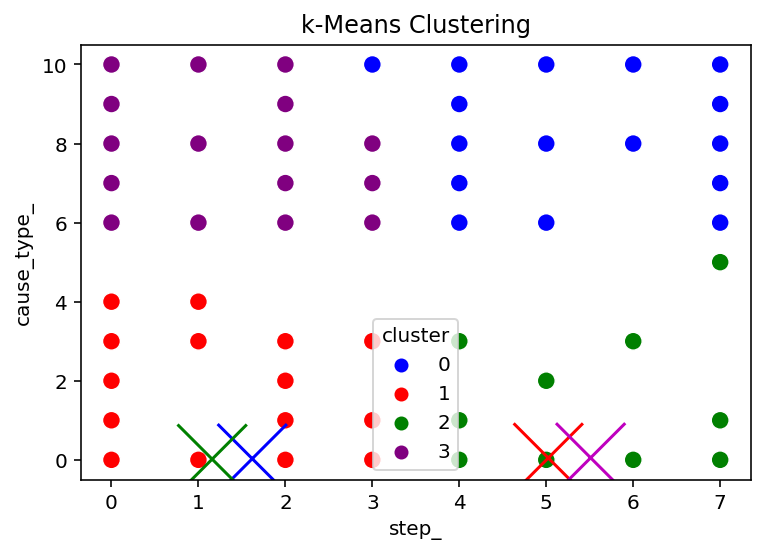

In [ ]:
color_dict = dict({0:'blue',
                  1:'red',
                  2: 'g',
                  3: 'purple' })

centroid_colors=['r','b','m', 'g']
sns.scatterplot('step_','cause_type_',data=df,hue='cluster', palette=color_dict, s=80)
plt.scatter(x_centroids, y_centroids,s=1200, marker='x', c=centroid_colors)
plt.title('k-Means Clustering')

plt.show()

In [ ]:
pvt = df.pivot_table(index='result',columns=['cluster'], values='weather_state_',
                     fill_value=0, aggfunc='count')
pvt 

cluster,0,1,2,3
result,,,,
Have Death,3,0,2,0
Have Injuries,28,47,30,15
Have Injuries and Death,0,1,2,0
No Injuries and Death,55,57,64,42


### $\color{violet}{\text{4. Decision Tree}}$ 

เป็นอัลกอริทึมซึ่งเรียนรู้จากคุณลักษณะของ attributes และสร้างผังการตัดสินใจที่คล้ายกับต้นไม้จึงถูกเรียกว่าต้นไม้ตัดสินใจ ซึ่งโดยปกติแล้ว มักใช้กับการจำแนกแยกแยะ ว่าข้อมูลนั้นจัดอยู่ในกลุ่มใด ผลลัพธ์จะมีเพียงแค่ 2 กลุ่มหรือมากกว่านั้นก็ได้ 
สำหรับกรณีนี้จะสร้างระบบคัดแยกการเกิดอุบัติเหตุว่าจะมีผู้บาดเจ็บ ผู้เสียชีวิต ไม่มีผู้บาดเจ็บและผู้เสียชีวิต หรือมีทั้งผู้บาดเจ็บและผู้เสียชีวิต 

ขั้นตอน
1. แบ่งเป็น train 70% และ test 30% จากนั้นทำการ train 
2. สร้าง model กำหนดให้ใช้อัลกอริทึมของ Decision Tree
3. ทดสอบประเมินประสิทธิภาพ โดยใช้ Accuracy และ Cross Validation ตามลำดับ

### ขั้นตอน

สร้าง modelกำหนดให้ใช้อัลกอริทึมของ Decision Tree กำหนดค่า max_dept = 4 กล่าวคือ แสดงความลึกของต้นไม้ให้มีแค่ 4 levels 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(max_depth=4)

ข้อมูลสำหรับนำมาสร้าง model มีดังนี้
* สภาพอากาศของวันที่เกิดอุบัติเหตุ
* สาเหตุที่ทำให้เกิดอุบัติเหตุ
* เส้นทางพิเศษที่ใช้เดินทาง
* จำนวนผู้บาดเจ็บ ผู้เสียชีวิต 

เพื่อให้ระบบเรียนรู้ Machine Learning ของไลบารี่ scikit-learn ทำงานได้อย่างมีประสิทธิภาพ ให้ทำการแทนที่ข้อความหรืออักษรของ class/target  ด้วยตัวเลข และต้องไม่ซ้ำกัน เช่น ในสภาพอากาศ ใช้ 0 แทน มีผู้เสียชีวิต ใช้ 1 แทน มีผู้บาดเจ็บ ใช้ 2 แทนไม่มีทั้งผู้บาดเจ็บกับผู้เสียชีวิต 



In [ ]:
X4 = df[['weather_state_','cause_type_','step_']]
y4 = df['result_']

In [ ]:
model4.fit(X4, y4)

DecisionTreeClassifier(max_depth=4)

In [ ]:
class_names4 = list(y_le.classes_)
class_names4

['Have Death',
 'Have Injuries',
 'Have Injuries and Death',
 'No Injuries and Death']

### แผนภาพ Decision Tree

สร้าง Diagram จาก model

In [ ]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

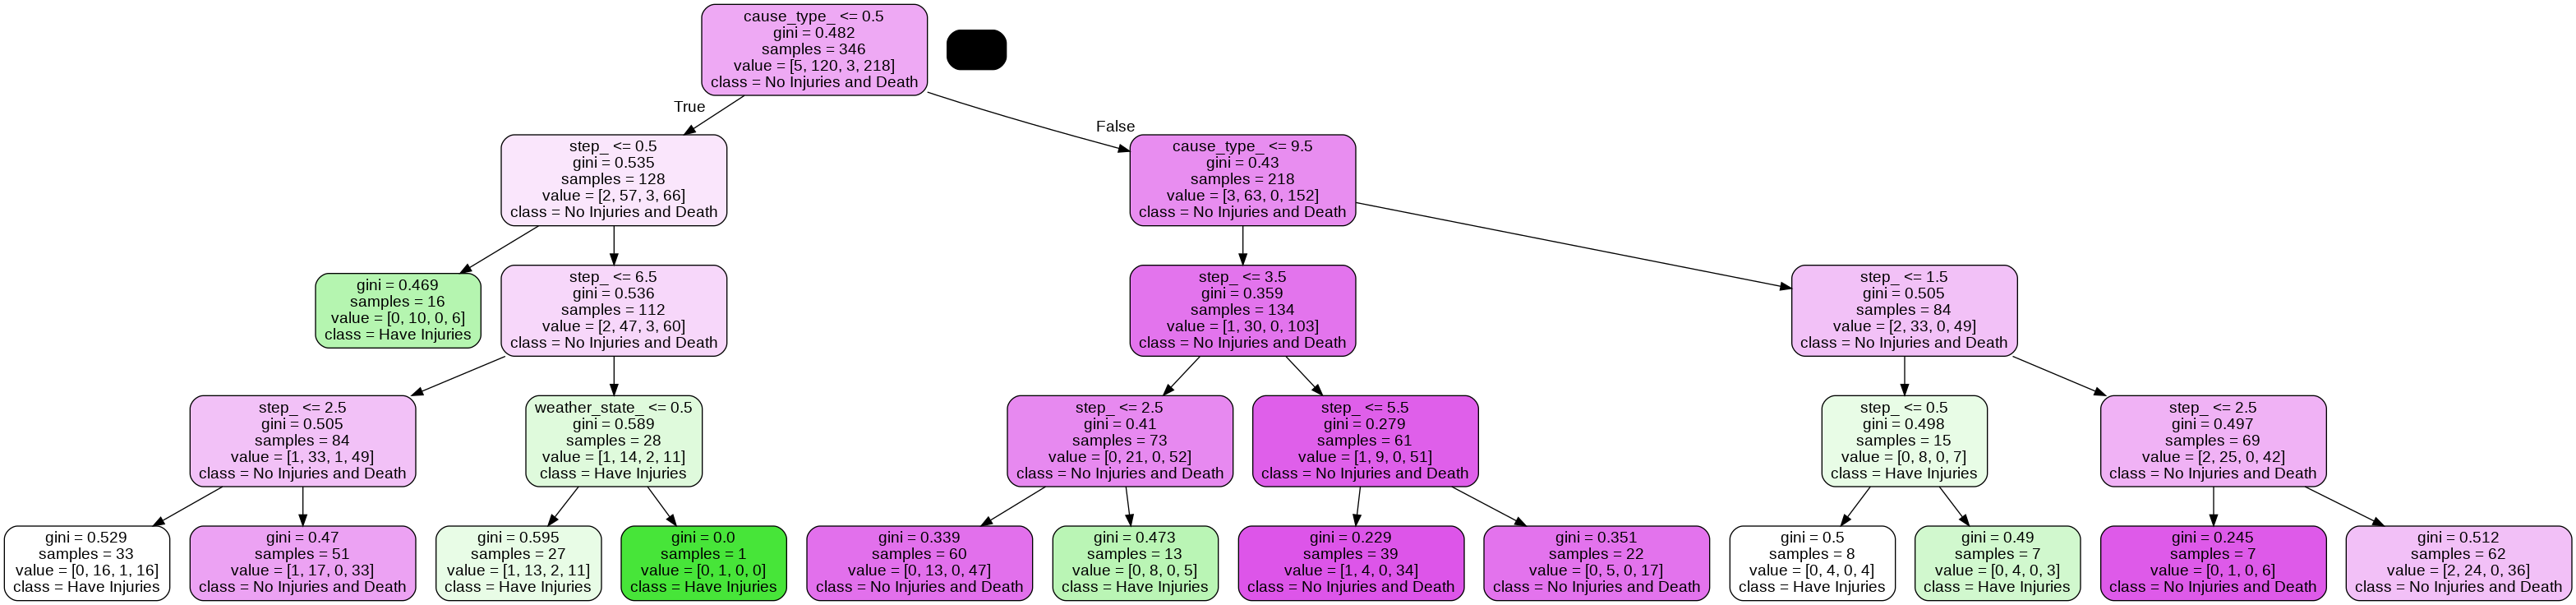

In [ ]:
data_feature_names4 = 'weather_state_','cause_type_','step_'

dot_data4 = export_graphviz(model4, out_file=None, feature_names=data_feature_names4, class_names=class_names4, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data4)
Image(graph.create_png()) 

Diagram นี้หมายความได้ว่า
* cause_type <= 0.5 คือค่าที่ใช้เป็นเกณฑ์ในการตัดแบ่งช่วง โดยจะมีทางเลือก 2 ทาง คล้าย ๆ กับการเขียน if เช่น ถ้า cause_type ไม่เกิน 0.5 จะไปทาง true คือได้ผลลัพธ์เป็น No Injuries and Death
* gini = 0.482 
gini ใช้ในการคำนวณเพื่อเลือกว่าจะให้อะไรเป็นเกณฑ์การแบ่งคัดแยกกลุ่ม ในกรณีนี้ใช้ cause_type เป็น root ในการแบ่งกลุ่ม ค่า 0.482 คือดัชนี gini 
* samples = 346 คือ จำนวนข้อมูล sample ที่นำมา train ให้กับระบบ คือ 346 ข้อมูล
* values = [..., ..., ...] คือตัวเลขที่แสดงระบบได้แบ่งข้อมูลออกเป็นฝั่งละเท่าไหร่ 
* class = … คือผลการทำนายที่บ่งบอกว่าเป็นอะไร เช่น No Injuries and Death


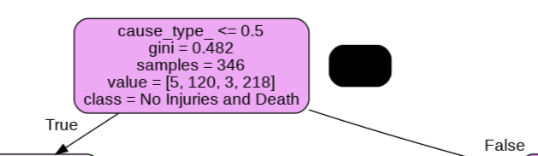

### ประเมินโมเดล Decision Tree

ทดสอบประเมินประสิทธิภาพ โดยใช้ Accuracy, Cross Validation และ Confusion Matrix ตามลำดับ

แบ่งเป็น train 70% และ test 30% จากนั้นทำการ train ทำการประเมินทดสอบประสิทธิภาพด้วย Accuracy

In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4 ,test_size=0.3,random_state=5)

In [ ]:
model4_ = DecisionTreeClassifier()
model4_.fit(X4_train, y4_train)

DecisionTreeClassifier()

In [ ]:
y4_predict= model4.predict(X4_test)

เมื่อประเมินเสร็จแล้วจะได้ค่าความแม่นยำเท่ากับ 62.500%

In [ ]:
print('Accuracy %:{:.3f}'.format(accuracy_score(y4_test,y4_predict)*100))

Accuracy %:62.500


ทำการประเมินทดสอบประสิทธิภาพด้วย cross validation โดยใช้ cv = 10 ผลการประเมินจะได้ค่าความแม่นยำ 10 ค่า 

In [ ]:
cvs4 = cross_val_score(model4, X4, y4, cv = 10)
print('cross val scores {}'.format(cvs4.round(3)))
print('mean = {:.3f}'.format(cvs4.mean()*100))

cross val scores [0.571 0.543 0.686 0.629 0.514 0.514 0.647 0.735 0.647 0.706]
mean = 61.924


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,


จากนั้นนำไปหาค่าเฉลี่ยจะได้ว่าความแม่นยำจาก cross validation คือ 61.924%

### Confusion Matrix เพื่อประเมิน Decision Tree Model

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# รายงานและ confusion matrix ที่ได้
cm = confusion_matrix(y4_test, y4_predict)
print(cm)

[[ 0  0  0  3]
 [ 0  9  0 21]
 [ 0  1  0  0]
 [ 0 14  0 56]]


In [ ]:
y_con_targets = ['Have Death',
 'Have Injuries',
 'Have Injuries and Death',
 'No Injuries and Death']

In [ ]:
print(classification_report(y4_test, y4_predict, target_names=y_con_targets))

                         precision    recall  f1-score   support

             Have Death       0.00      0.00      0.00         3
          Have Injuries       0.38      0.30      0.33        30
Have Injuries and Death       0.00      0.00      0.00         1
  No Injuries and Death       0.70      0.80      0.75        70

               accuracy                           0.62       104
              macro avg       0.27      0.28      0.27       104
           weighted avg       0.58      0.62      0.60       104



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


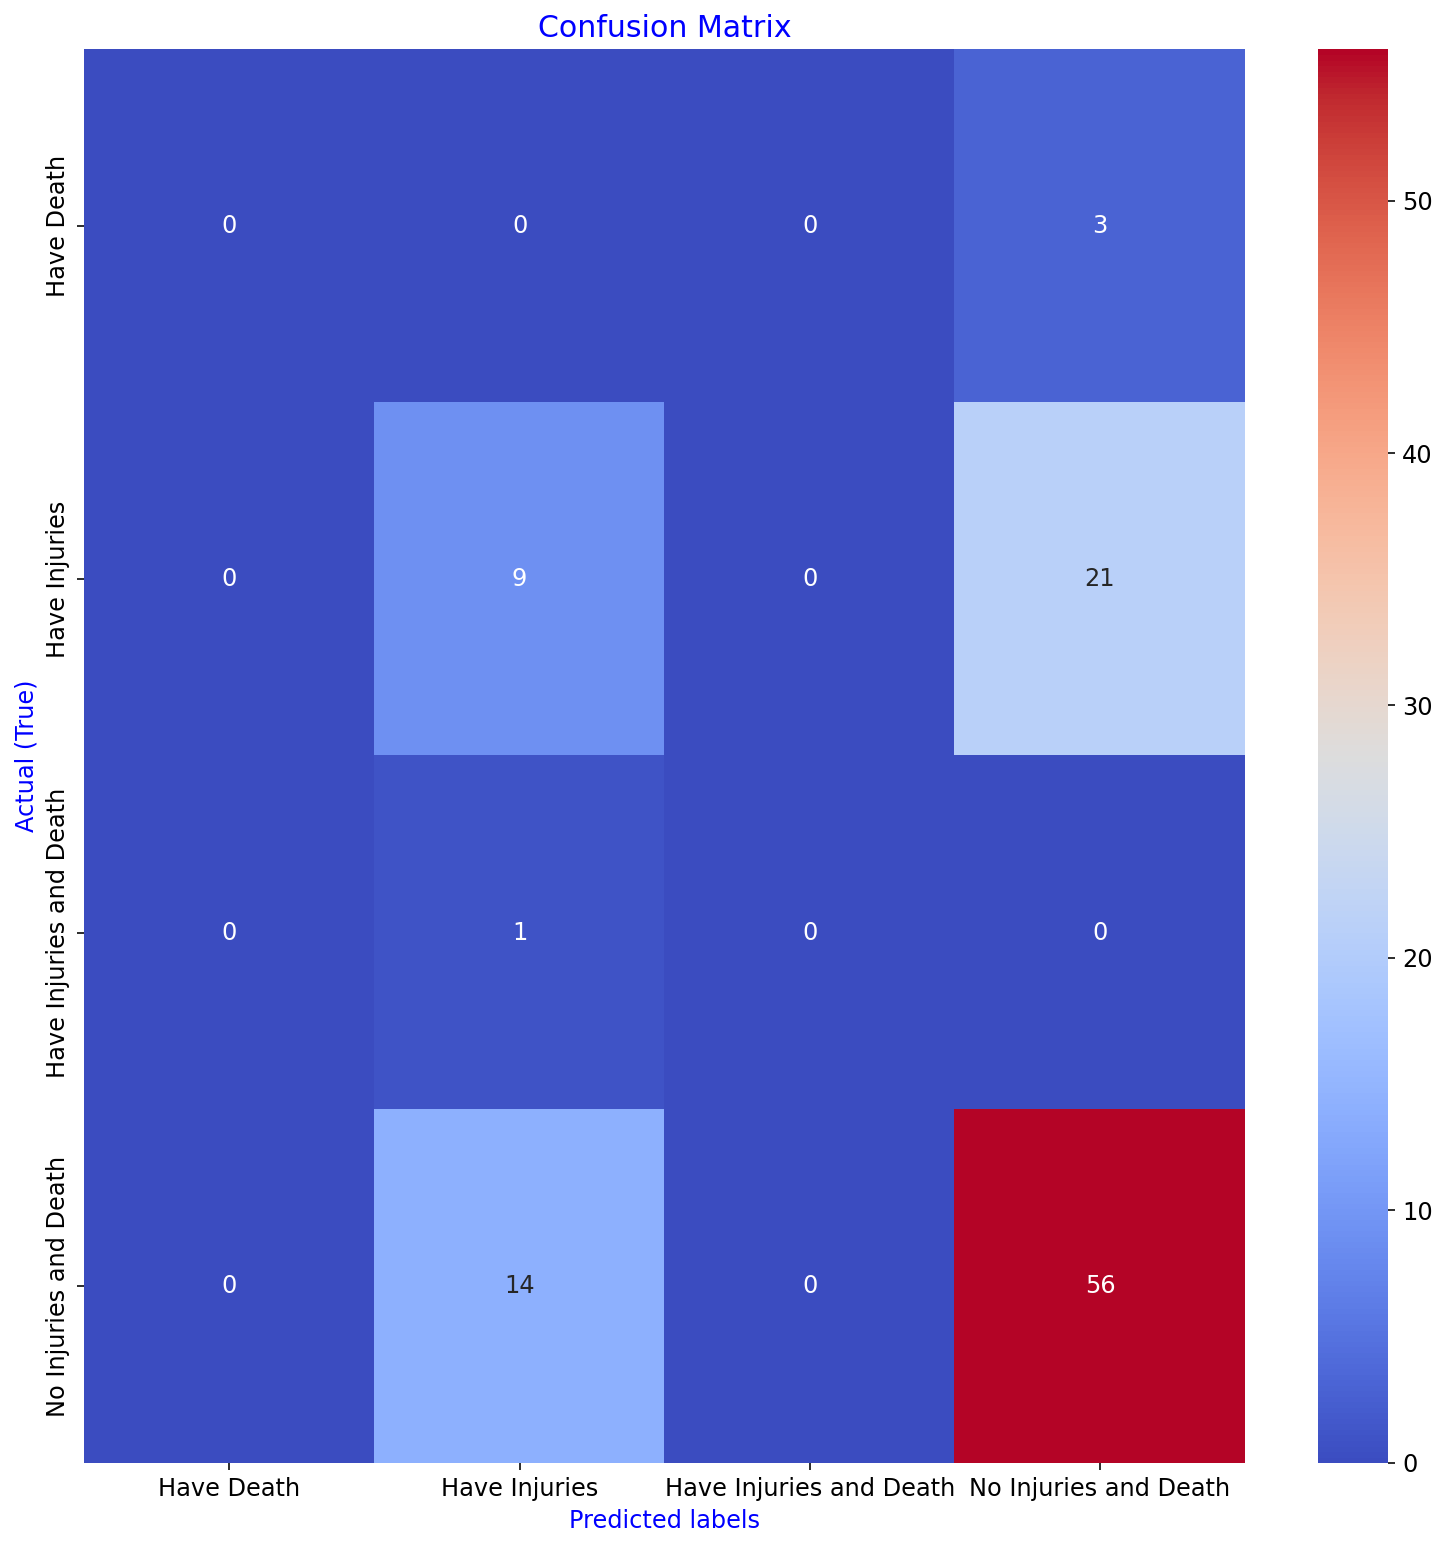

In [ ]:
ax = plt.subplot()
plt.rcParams['figure.figsize'] = 13, 13
plt.rcParams.update({'font.size':12})

cmm = confusion_matrix(y4_test, y4_predict)
sns.heatmap(cmm, annot=True, ax =ax, cmap="coolwarm")
ax.set_xlabel('Predicted labels', fontsize = 12, color = 'blue', alpha = 1)
ax.set_ylabel('Actual (True)', fontsize = 12, color = 'blue', alpha = 1)
ax.set_title('Confusion Matrix', fontsize = 15, color = 'blue', alpha = 1)
ax.xaxis.set_ticklabels(y_con_targets)
ax.yaxis.set_ticklabels(y_con_targets)
plt.show()

จะได้ผลลัพธ์เป็นจำนวนทดสอบคือ มี Have Death 3 เคส มี Have Injuries มี 30 เคส มี Have Injuries and Death มี 1 เคส และ No Injuries and Death มี 70 เคส จากค่า f-1 score แสดงให้เห็นว่า model ของระบบนี้มีความแม่นยำในการตรวจจับ No Injuries and Death มากที่สุดคือ 0.75 หรือ 75% ส่วนประสิทธิภาพการตรวจจับ Have Death และ Have Injuries and Death ค่อนข้างต่ำ

### $\color{violet}{\text{5. Logistic Regression}}$ 
เป็นอัลกอริทึมที่ให้ output เป็นข้อมูลไม่ต่อเนื่อง เช่น 0 หรือ 1 (Binary Classes) ใช่ หรือ ไม่ใช่ เป็นต้น เหมาะแก่การใช้สำหรับ classification โดยหลักการคือนำจุดข้อมูลมาหาสมการเส้นตรงก่อน จะได้ y = mx+b นั่นเอง จากนั้นนำค่า y ไปเข้าสมการ sigmoid function จะได้ค่า 0 กับ -1 ซึ่งเป็น output ที่ได้ของการทำนาย โดยในที่นี้ Logistic Regression เป็นแบบ Multinomial เนื่องจาก Class หรือว่าผลลัพธ์นั้นมี 4 แบบ ได้แก่ Have Death, Have Injuries, No Injuries and Death และ Have Injuries and Death

ขั้นตอน
1. แบ่งเป็น train 70% และ test 30% จากนั้นทำการ train 
2. สร้าง model กำหนดให้ใช้อัลกอริทึมของ Logistic Regression
3. ทดสอบประเมินประสิทธิภาพ โดยใช้ Accuracy และ Cross Validation ตามลำดับ

เมื่อทดสอบประเมินประสิทธิภาพด้วยตัว test แล้วจะได้ค่าประสิทธิภาพ 67.308%
  จากนั้นทำการประเมินทดสอบประสิทธิภาพด้วย cross validation โดย cv = 2 กล่าวคือ แบ่งเป็น 2 ส่วน จะได้ค่าเฉลี่ยเป็น 63.006% ซึ่งถือว่ามีความแม่นยำค่อนข้างพอใช้ได้


In [ ]:
from sklearn.linear_model import LogisticRegression
model5 = LogisticRegression(multi_class='multinomial',solver='lbfgs')

In [ ]:
X5 = df[['weather_state_','cause_type_', 'step_']]
y5 = df.result_

In [ ]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=7)

In [ ]:
model5.fit(X5_train, y5_train)

LogisticRegression(multi_class='multinomial')

In [ ]:
y5_predict = model5.predict(X5_test)

### ประเมิน Model Logistics Regression

In [ ]:
print('Accuracy %:{:.3f}'.format(accuracy_score(y5_test, y5_predict)*100))

Accuracy %:67.308


In [ ]:
cvs5 = cross_val_score(model5, X5, y5, cv = 2)
print('cross val scores {}'.format(cvs5))
print('mean = {:.3f}'.format(cvs5.mean()*100))

cross val scores [0.6300578 0.6300578]
mean = 63.006


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### $\color{violet}{\text{6. Random Forest }}$ 

หลักการของ random forest จะคล้ายกับ decision tree แต่จะต่างตรงสุ่มเอาข้อมูลไปสร้างเป็นต้นไม้หลาย ๆ ต้น แต่ละต้นเรียกว่า subset เหมือนกับมีป่าจำนวนมาก ๆ ซึ่งแต่ละต้นจะมีรูปแบบสุ่มที่ไม่เหมือนกัน โดยในตอนการใช้งานทำนายแต่ละต้นก็ทำการทำนายแล้วเลือกผลที่ได้จากการโหวตที่มากที่สุดมาเป็นผลลัพธ์

ขั้นตอน
1. แบ่งเป็น train 70% และ test 30% จากนั้นทำการ train 
2. สร้าง model กำหนดให้ใช้อัลกอริทึมของ Random Forest ปกติแล้วนั้นสามารถกำหนดค่า n_estimators ที่ต้องการจำนวนได้ แต่ถ้าไม่กำหนด อัลกอริทึมจะใช้ default คือ 100 ต้น เช่น ในกรณีนี้ไม่ได้กำหนด n_estimators ไว้ อัลกอริทึมจึงทำการกำหนดให้เป็น 100 ต้น
3. ทดสอบประเมินประสิทธิภาพ โดยใช้ Accuracy และ Cross Validation ตามลำดับ

เมื่อทดสอบประเมินประสิทธิภาพด้วยตัว test แล้วจะได้ค่าประสิทธิภาพเท่ากับ 60.577
  จากนั้นทำการประเมินทดสอบประสิทธิภาพด้วย cross validation โดยใช้ cv = 10 ผลการประเมินจะได้ค่าความแม่นยำ 10 ค่า จากนั้นนำไปหาค่าเฉลี่ยจะได้ว่าความแม่นยำคือ 59.563% ซึ่งถือว่าความแม่นยำยังไม่มากนัก และยังน้อยกว่า Decision Tree และ Logistic Regression

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X6 = df[['step_', 'weather_state_','cause_type_']]
y6 = df['result_']

In [ ]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3, random_state=7)

In [ ]:
model6=RandomForestClassifier()
model6.fit(X6_train, y6_train)
y6_predict = model6.predict(X6_test)

### ประเมิน Model Random Forest

In [ ]:
print('Accuracy %:{:.3f}'.format(accuracy_score(y6_test, y6_predict)*100))

Accuracy %:60.577


In [ ]:
cvs6 = cross_val_score(model6, X6, y6, cv = 10)
print('cross val scores {}'.format(cvs6.round(3)))
print('mean = {:.3f}'.format(cvs6.mean()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,


cross val scores [0.571 0.514 0.686 0.657 0.514 0.543 0.647 0.588 0.618 0.706]
mean = 60.445




---




># $\color{orange}{\text{สรุปค่าประเมิน Model}}$ 

---

เพื่อเปรียบเทียบค่าแม่นยำของแต่ละ Model อีกครั้ง จึงใช้ข้อมูลในชุดเดียวกันในการประเมิน ได้แก่ XX_test และ yy_test ซึ่งได้มาจากการแบ่งข้อมูล train test spilt โดยสร้าง dataframe ใหม่ ชื่อ dscore เพื่อเก็บค่าประเมิน Accuracy, Cross Validation, Confusion Matrix โดยเลือกแสดงแค่ค่าประเมินความแม่นยำ Accuracy และ Cross Validation เท่านั้น
* เรียงตามค่าประเมิน Accuracy พบว่าอันดับหนึ่ง ได้แก่ Logistic Regression ซึ่งมีค่าเท่ากับ 67.308% ส่วนอันดับสอง ได้แก่ K-Neighbors มีค่าเท่ากับ 61.538% 
* เรียงตามค่าประเมิน Cross Validation อันดับหนึ่ง ได้แก่ Logistic Regression มีค่าเท่ากับ 65.636% ส่วนอันดับสอง ได้แก่ Random Forest ซึ่งมีค่าเท่ากับ 64.818%

ดังนั้นหากนำข้อมูลสภาพอากาศ, สาเหตุที่ทำให้เกิดอุบัติเหตุ และเส้นทางด่วนพิเศษมาทำนายว่ามีจำนวนผู้บาดเจ็บหรือผู้มีเสียชีวิตเท่าไหร่ด้วย อัลกอริทึม Logistic Regression จะสามารถทำนายได้ใกล้เคียงกับผลที่เกิดขึ้นจริงมากที่สุดเมื่อเทียบกับ Model อื่น ๆ

In [ ]:
test_size=.3
XX_train, XX_test, yy_train, yy_test = train_test_split(
    df[['step_', 'weather_state_','cause_type_']], 
    df.result_, 
    test_size=test_size, random_state=7)

In [ ]:
algo = [
    [KNeighborsClassifier(n_neighbors=10), 'KNeighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    [GaussianNB(), 'GaussianNB'],
    [DecisionTreeClassifier(),'DecisionTreeClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier']

]
model_score=[]
for a in algo:
    model=a[0]
    model.fit(XX_train, yy_train) # step 2: fit
    y_pred=model.predict(XX_test) # step 3: predict
    score=model.score(XX_test, yy_test)
    cvs = cross_val_score(model, XX_test, yy_test, cv = 10)
    model_score.append([score*100, cvs.mean()*100, a[1]])
    print(f'{a[1]} Accuracy % = {score*100:.3f} %') # step 4: score
    print(metrics.confusion_matrix(yy_test, y_pred))
    print(metrics.classification_report(yy_test, y_pred))
    print('-' * 100)
print(model_score)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

KNeighborsClassifier Accuracy % = 61.538 %
[[14  0 19]
 [ 1  0  0]
 [20  0 50]]
              precision    recall  f1-score   support

           1       0.40      0.42      0.41        33
           2       0.00      0.00      0.00         1
           3       0.72      0.71      0.72        70

    accuracy                           0.62       104
   macro avg       0.37      0.38      0.38       104
weighted avg       0.61      0.62      0.61       104

----------------------------------------------------------------------------------------------------
LogisticRegression Accuracy % = 67.308 %
[[ 0  0 33]
 [ 0  0  1]
 [ 0  0 70]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00         1
           3       0.67      1.00      0.80        70

    accuracy                           0.67       104
   macro avg       0.22      0.33      0.27       104
weighted avg       0.45      0.67 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_spl

RandomForestClassifier Accuracy % = 59.615 %
[[10  0 23]
 [ 1  0  0]
 [18  0 52]]
              precision    recall  f1-score   support

           1       0.34      0.30      0.32        33
           2       0.00      0.00      0.00         1
           3       0.69      0.74      0.72        70

    accuracy                           0.60       104
   macro avg       0.35      0.35      0.35       104
weighted avg       0.58      0.60      0.59       104

----------------------------------------------------------------------------------------------------
[[61.53846153846154, 63.54545454545455, 'KNeighborsClassifier'], [67.3076923076923, 65.63636363636364, 'LogisticRegression'], [2.8846153846153846, 56.18181818181818, 'GaussianNB'], [56.730769230769226, 62.727272727272734, 'DecisionTreeClassifier'], [59.61538461538461, 66.72727272727272, 'RandomForestClassifier']]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dscore=pd.DataFrame(model_score, columns=['accuracy %','cross validation','classifier'])
dscore

,accuracy %,cross validation,classifier
0,61.538462,63.545455,KNeighborsClassifier
1,67.307692,65.636364,LogisticRegression
2,2.884615,56.181818,GaussianNB
3,56.730769,62.727273,DecisionTreeClassifier
4,59.615385,66.727273,RandomForestClassifier


In [ ]:
dscore[['classifier','accuracy %']].sort_values(['accuracy %'], ascending=False).set_index([pd.Index([1,2,3,4,5])])

,classifier,accuracy %
1,LogisticRegression,67.307692
2,KNeighborsClassifier,61.538462
3,RandomForestClassifier,59.615385
4,DecisionTreeClassifier,56.730769
5,GaussianNB,2.884615


In [ ]:
dscore[['classifier','cross validation']].sort_values(['cross validation'], ascending=False).set_index([pd.Index([1,2,3,4,5])])

,classifier,cross validation
1,RandomForestClassifier,66.727273
2,LogisticRegression,65.636364
3,KNeighborsClassifier,63.545455
4,DecisionTreeClassifier,62.727273
5,GaussianNB,56.181818
